# Elimination with Matrices
视频链接：https://www.youtube.com/watch?v=QVKj3LADCnA

将我的笔记用md/latex公式化、numpy代码化、和plt可视化。

In [4]:
import numpy as np

# 初始矩阵
A = np.array([
    [1, 2, 1],
    [3, 8, 1],
    [0, 4, 1]
], dtype=float)

# 第一步：R2 = R2 - 3 * R1
A[1] = A[1] - 3 * A[0]

# 第二步：R3 = R3 - 2 * R2
A[2] = A[2] - 2 * A[1]

print("消元后的矩阵：\n", A)

消元后的矩阵：
 [[ 1.  2.  1.]
 [ 0.  2. -2.]
 [ 0.  0.  5.]]


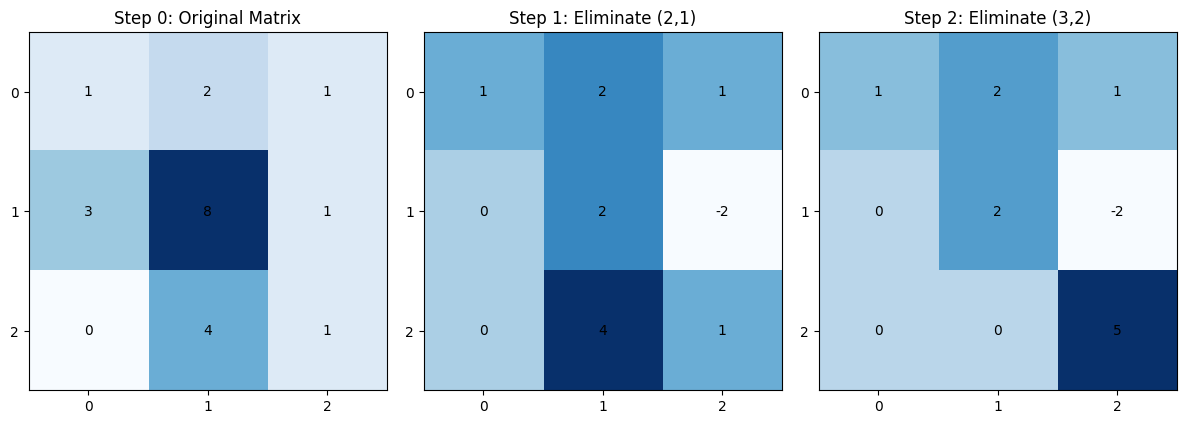

In [5]:
import matplotlib.pyplot as plt

def plot_matrix(A, title, subplot):
    # 在指定的子图位置创建一个 subplot，例如 subplot=131 表示 1行3列中的第1个图
    ax = plt.subplot(subplot)

    # 使用 imshow 显示矩阵 A，颜色映射使用 "Blues"，vmin/vmax 控制颜色范围
    ax.imshow(A, cmap="Blues", vmin=np.min(A), vmax=np.max(A))

    # 设置 X 轴刻度位置（0, 1, ..., n-1）
    ax.set_xticks(np.arange(A.shape[1]))

    # 设置 Y 轴刻度位置（0, 1, ..., m-1）
    ax.set_yticks(np.arange(A.shape[0]))

    # 双重循环遍历矩阵的每个元素，用文本标记数值
    for i in range(A.shape[0]):          # 遍历行
        for j in range(A.shape[1]):      # 遍历列
            # 在每个单元格中央写上对应的矩阵值，保留整数（.0f）
            ax.text(j, i, f"{A[i,j]:.0f}", va='center', ha='center', color='black')

    # 设置图像的标题
    ax.set_title(title)

# 初始矩阵
A1 = np.array([
    [1, 2, 1],
    [3, 8, 1],
    [0, 4, 1]
], dtype=float)

# 第一步
A2 = A1.copy()
A2[1] -= 3 * A2[0]

# 第二步
A3 = A2.copy()
A3[2] -= 2 * A3[1]

# 绘图
plt.figure(figsize=(12, 4))
plot_matrix(A1, "Step 0: Original Matrix", 131)
plot_matrix(A2, "Step 1: Eliminate (2,1)", 132)
plot_matrix(A3, "Step 2: Eliminate (3,2)", 133)
plt.tight_layout()
plt.show()